In [161]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
import seaborn as sns
import json
import heapq
import random

from collections import OrderedDict

def unique_ordered_list(input_list):
    # Use an OrderedDict to maintain order and eliminate duplicates
    unique_dict = OrderedDict.fromkeys(input_list)

    # Get the keys (unique values) from the OrderedDict
    unique_list = list(unique_dict.keys())

    return unique_list

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


def sim(trck,times,distance,dogs,lower_mult,upper_mult,lower_lim,upper_lim,clear_fave,BSP,few_dogs,use_straight_preds,use_320_preds,use_395_preds,use_520_preds,use_traralgon_preds):
    tracks=[trck]

    under_3=False
    for track in tracks:
        if few_dogs == False:
            data=pd.read_csv('class4/'+track+'.csv')
        
        if few_dogs == True:
            data=pd.read_csv('class3/'+track+'.csv')
        
        overall=[]
        for dist in data['Distance'].unique():
            if dist==distance:
                data2=data[data['Distance']==dist]
        #             print(data2.shape[0])
                if(data2.shape[0]>1000):
                    
                    if(use_straight_preds):
                        preds = ['split_z_avg', 'last_5_avg', 'at_cas_dist_time', 'mean_place', 'pir3', 'at_cas_perc', 'collision', 'i1', 'mean_in_race_pos']
                    
                    if(use_320_preds):
                        preds = ['faster_inside','i2','i1','split_z_avg','last_5_avg']
                    
                    if(use_395_preds):
                        preds = ['at_cas_dist_time_avg', 'faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'time_z_avg']
                    
                    if(use_520_preds):
                        preds = ['at_cas_dist_time_avg', 'faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'in_form', 'mean_in_race_pos', 'last_5_avg']
                        
                    if(use_traralgon_preds):
                        preds = ['ctime_z_avg','last_5_avg']
                    
                    data2=data2.dropna(subset = preds)

                    races= data2['RaceId'].unique()

                    if few_dogs == False:
                        invalid = pd.read_csv('Invalid/Invalid_'+track+'.csv')
                        
                    if few_dogs == True:
                        invalid = pd.read_csv('Invalid3/Invalid'+track+'.csv')
                        
                    invalid = list(invalid['Invalid'])
    #                 print(preds)
    
                    mod = LogisticRegression(random_state=42,max_iter=2000).fit(data2[preds], data2['Win'])

                    wins=0
                    losses=0
                    money=0
                    randmoney=0
                    betsize=1
                    
                    data3 = data2.dropna(subset=['price'])

                    ls = list(data3['RaceId'])
                    unique_ordered_lista = unique_ordered_list(ls)

                    for raceid in unique_ordered_lista:
                        if data3[data3['RaceId']==raceid].shape[0] in dogs and raceid not in invalid:                                      
                            race = data3[data3['RaceId']==raceid]
                            race=race.sort_values(by='RunTime')
                            race=race.reset_index()

                            predicted_times = mod.predict_proba(race[preds])
                            predicted_times = np.transpose(predicted_times)[1]
                            predicted_times = predicted_times/sum(predicted_times)
                            our_prices=1/(predicted_times)

                            if BSP==True:
                                prices = list(race['BSP'])
                            if BSP==False:
                                prices = list(race['price'])

                            #print(race)
                            #print(race['Date'][1])
                            if race['Date'][1] == '2023-03-09':
                                print(race)
                                print(our_prices)
                                print(prices)

                            to_bet_on = np.argmin(our_prices)
                            our_price = our_prices[to_bet_on]
                            their_price = prices[to_bet_on]
                            their_favourite = np.argmin(prices)
                            their_favourite_price = prices[their_favourite]
                            our_take = our_prices[their_favourite]
                            our_prices1 = sorted(our_prices)
                            our_take1 = our_prices1.index(our_take)

                            our_prices1 = list(our_prices.copy())
                            our_prices1.remove(our_price)
                            to_bet_on1 = np.argmin(our_prices1)
                            our_price1 = our_prices1[to_bet_on1] 



                            if our_price1-our_price>1.3:
                                clear_fav = True
                            else:
                                clear_fav = False

                            if raceid==877730702:
                                data3[data3['RaceId']==877730702].to_csv('eeee.csv')


                            if (their_price/our_price>lower_mult and their_price/our_price<upper_mult and their_price>lower_lim and their_price<upper_lim and clear_fav == clear_fave):
#                                 if their_favourite != to_bet_on and their_price<3:
#                                                     rand = random.randint(0, 4)
#                                                     their_price_rand = prices[rand]

#                                                     while their_price_rand > 4.5:
#                                                         rand = random.randint(0, 7)
#                                                         their_price_rand = prices[rand]

#                                                     if(rand==0):
#                                                         randmoney+=(their_price_rand-1)*betsize
#                                                     else:
#                                                         randmoney-=betsize

                                if(to_bet_on==0):
                                    if BSP == True:
                                        money+=(their_price-1)*betsize*0.75
                                        wins+=1
                                    else:
                                        money+=(their_price-1)*betsize
                                        wins+=1



                                    #print(money)
                                    #print(their_price)
                                    #print('---')
                                    #print(our_price)
                                    #print(race['Date'][1])
                                    #print(our_prices)
                                    #print(our_price)
                                    #print(prices)
                                    #print('win')
                                else:
                                    money-=betsize
                                    losses+=1



                                    #print(money)
                                    #print(our_price)
                                    #print(race['Date'][1])
                                    #print(raceid)
                                    #print(their_price)
                                    #print(our_prices)
                                    #print(prices)
                                    #print('loss')


                    bets = wins+losses

                    if(bets!=0):
                        invested = bets*betsize
                        roi=100*(money/invested)
                        win_rate = wins/(wins+losses)


                    else:
                        invested=0
                        roi=0
                        win_rate = 0

                    res=[round(roi),round(win_rate,2),bets]
                    #res=[round(roi),round(win_rate,2),bets,'            ',randmoney]
                    


            #df = pd.DataFrame(overall)
            #df.columns=['track','dist','strat','max-size','multiplier','roi','winrate','bets']
    
    return res
        
        

In [166]:
#sim(trck,times,distance,dogs,lower_mult,upper_mult,lower_lim,upper_lim,clear_fav,use_bsp,use_straight_preds,use_320_preeds,use_395_preds,use_520_preds,use_traralgon)

sim('maitland',False,450,[7,8],   0.1,47,   1,10,   True,False,False,   False,False,False,True,False)


   index  Unnamed: 0           DogName  RunTime  Split  Place        Date  \
0   8787        8787           vamoose    24.96   7.63      1  2023-03-09   
1   8788        8788     coonamble kid    24.98   7.72      2  2023-03-09   
2   8789        8789         orara dan    25.28   7.80      3  2023-03-09   
3   8790        8790        coco model    25.30   7.79      4  2023-03-09   
4   8791        8791  wrote the script    25.33   7.84      5  2023-03-09   
5   8792        8792        on the bus    25.38   7.90      6  2023-03-09   
6   8793        8793     sirius gamble    25.66   7.95      7  2023-03-09   

      RaceId  Distance  Weight  ...  b2  b3  b4  b5  b6  b7  b8  i1  i2  price  
0  877730702       450    32.5  ...   0   0   1   0   0   0   0   0   1    1.8  
1  877730702       450    35.6  ...   0   0   0   1   0   0   0   0   1    4.2  
2  877730702       450    30.9  ...   0   0   0   0   0   0   1   0   0    7.0  
3  877730702       450    28.7  ...   0   0   0   0   0   1

[-4, 0.41, 37]

<function matplotlib.pyplot.show(close=None, block=None)>

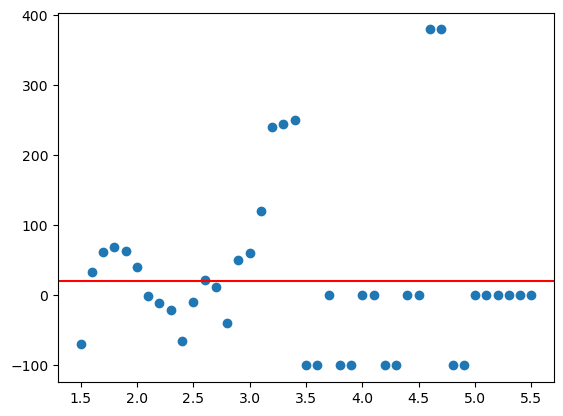

In [112]:
# dic = {}
# tracker = []
# rois = []
# hits = []
# bets = []

# for i in range(0,41):
#     tracker.append(1.5+i*0.1)
#     ls = sim('albion park',False,395,[7,8],   0.1,47,   (1.5+i*0.1),(1.8+i*0.1),   True,False,False,   False,True,False,False,False)
#     if ls[2]
#         rois.append(ls[0])
#         hits.append(ls[1])
#         bets.append(ls[2])
#         dic[1.5+i*0.1] = ls[2]
    
# plt.scatter(tracker,rois)
# plt.axhline(y = 20, color = 'r', linestyle = '-')
# plt.show

In [110]:
#dic

{1.5: 7,
 1.6: 16,
 1.7: 12,
 1.8: 11,
 1.9: 7,
 2.0: 8,
 2.1: 10,
 2.2: 10,
 2.3: 13,
 2.4: 9,
 2.5: 5,
 2.6: 5,
 2.7: 3,
 2.8: 6,
 2.9000000000000004: 3,
 3.0: 3,
 3.1: 6,
 3.2: 3,
 3.3: 4,
 3.4000000000000004: 2,
 3.5: 1,
 3.6: 1,
 3.7: 1,
 3.8000000000000003: 3,
 3.9000000000000004: 2,
 4.0: 2,
 4.1: 2,
 4.2: 0,
 4.300000000000001: 0,
 4.4: 0,
 4.5: 0,
 4.6: 0,
 4.7: 0,
 4.800000000000001: 6,
 4.9: 6,
 5.0: 0,
 5.1: 0,
 5.2: 0,
 5.300000000000001: 1,
 5.4: 1,
 5.5: 0}